# Preprocessing and cleaning of the data

In [437]:
import pandas as pd

In [438]:
data = pd.read_csv("../../data/data.csv")

Raw dataset

In [439]:
data.head()

,"PESSOA, PIPEDRIVE",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 63,Unnamed: 64,"COBRANÇA, VINDI",Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72
0,id_person,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,...,Ligações Outbound,Data Última Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos
1,250,1971-04-01,64,82,São Paulo,São Paulo,04534-020,417,NaN,2021-01-28,...,2,2022-04-25 19:18:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
2,254,NaN,NaN,NaN,North Carolina,Mecklenburg County,28203,NaN,NaN,2020-12-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
3,314,1985-08-01,NaN,NaN,São Paulo,São Paulo,05337-030,NaN,NaN,2021-01-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
4,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE


## Manipulation of headers and columns

Merge Header with column names

    - PESSOA, PIPEDRIVE coulmns [A,R]
    - FUNIL ASSINATURA, PIPEDRIVE [S,X]
    - FUNIL ONBOARDING, PIPEDRIVE [Y, AH]
    - ATENDIMENTOS, AGENDA [AJ, AY]
    - WHOQOL [AZ, BD]
    - COMUNICARE [BE]
    - TWILIO [BF, BM]
    - COBRANÇA, VINDI [BN, BU]

In [440]:
def column_label_to_index(col_label):
    col_index = 0
    for c in col_label.upper():
        col_index = col_index * 26 + (ord(c) - ord('A') + 1)
    return col_index - 1


def add_prefix_to_first_row(dataframe, prefix, start_col_label, end_col_label):
    start_col = column_label_to_index(start_col_label)
    end_col = column_label_to_index(end_col_label)
    for col in range(start_col, end_col + 1):
        dataframe.iat[0, col] = prefix + dataframe.iat[0, col]

In [441]:
add_prefix_to_first_row(data, 'PESSOA_PIPEDRIVE_', 'A', 'R')
add_prefix_to_first_row(data, 'FUNIL_ASSINATURA_PIPEDRIVE_', 'S', 'X')
add_prefix_to_first_row(data, 'FUNIL_ONBOARDING_PIPEDRIVE_', 'Y', 'AH')
add_prefix_to_first_row(data, 'ATENDIMENTOS_AGENDA_', 'AJ', 'AY')
add_prefix_to_first_row(data, 'WHOQOL_', 'AZ', 'BD')
add_prefix_to_first_row(data, 'COMUNICARE_', 'BE', 'BE')
add_prefix_to_first_row(data, 'TWILIO_', 'BF', 'BM')
add_prefix_to_first_row(data, 'COBRANÇA_VINDI_', 'BN', 'BU')

In [442]:
data.columns = data.iloc[0]
data = data.drop(data.index[0])

Final result


In [443]:
data.head()

,PESSOA_PIPEDRIVE_id_person,PESSOA_PIPEDRIVE_birthdate,PESSOA_PIPEDRIVE_id_gender,PESSOA_PIPEDRIVE_id_marrital_status,PESSOA_PIPEDRIVE_state,PESSOA_PIPEDRIVE_city,PESSOA_PIPEDRIVE_postal_code,PESSOA_PIPEDRIVE_id_health_plan,PESSOA_PIPEDRIVE_id_person_recommendation,PESSOA_PIPEDRIVE_contract_start_date,...,TWILIO_Ligações Outbound,TWILIO_Data Última Ligações Outbound,COBRANÇA_VINDI_Qde Total de Faturas,COBRANÇA_VINDI_Qde Total de Tentativas de Cobrança,COBRANÇA_VINDI_Método de Pagamento,COBRANÇA_VINDI_Valor Médio da Mensalidade,COBRANÇA_VINDI_Qde Total de Faturas Pagas após Vencimento,COBRANÇA_VINDI_Qde Total de Faturas Inadimpletes,COBRANÇA_VINDI_Valor Total Inadimplência,COBRANÇA_VINDI_Qde Perfis de Pagamento Inativos
1,250,1971-04-01,64,82,São Paulo,São Paulo,04534-020,417,NaN,2021-01-28,...,2,2022-04-25 19:18:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
2,254,NaN,NaN,NaN,North Carolina,Mecklenburg County,28203,NaN,NaN,2020-12-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
3,314,1985-08-01,NaN,NaN,São Paulo,São Paulo,05337-030,NaN,NaN,2021-01-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
4,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
5,317,1986-10-14,NaN,NaN,São Paulo,São Paulo,05421-050,NaN,NaN,2021-01-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE


## Understanding the dataset


In [444]:
data.shape

(1202, 73)

In [445]:
data.describe()

,PESSOA_PIPEDRIVE_id_person,PESSOA_PIPEDRIVE_birthdate,PESSOA_PIPEDRIVE_id_gender,PESSOA_PIPEDRIVE_id_marrital_status,PESSOA_PIPEDRIVE_state,PESSOA_PIPEDRIVE_city,PESSOA_PIPEDRIVE_postal_code,PESSOA_PIPEDRIVE_id_health_plan,PESSOA_PIPEDRIVE_id_person_recommendation,PESSOA_PIPEDRIVE_contract_start_date,...,TWILIO_Ligações Outbound,TWILIO_Data Última Ligações Outbound,COBRANÇA_VINDI_Qde Total de Faturas,COBRANÇA_VINDI_Qde Total de Tentativas de Cobrança,COBRANÇA_VINDI_Método de Pagamento,COBRANÇA_VINDI_Valor Médio da Mensalidade,COBRANÇA_VINDI_Qde Total de Faturas Pagas após Vencimento,COBRANÇA_VINDI_Qde Total de Faturas Inadimpletes,COBRANÇA_VINDI_Valor Total Inadimplência,COBRANÇA_VINDI_Qde Perfis de Pagamento Inativos
count,1202,1191,1178,1178,1185,1183,1163,524,110,1202,...,579,579,252,252,252,252,252,252,252,1202
unique,1202,1100,5,4,24,196,932,47,81,422,...,16,575,21,36,4,33,10,7,16,1
top,250,1995-01-16,64,80,São Paulo,São Paulo,69730-000,412,2379,2023-06-12,...,1,2022-12-22 19:46:59,3,1,Cartão de crédito,88.00,0,0,0,FALSE
freq,1,8,602,830,570,197,96,281,9,43,...,240,3,35,27,227,99,150,218,218,1202


## Managing missing values


In [446]:
import missingno as msno

<Axes: xlabel='0'>

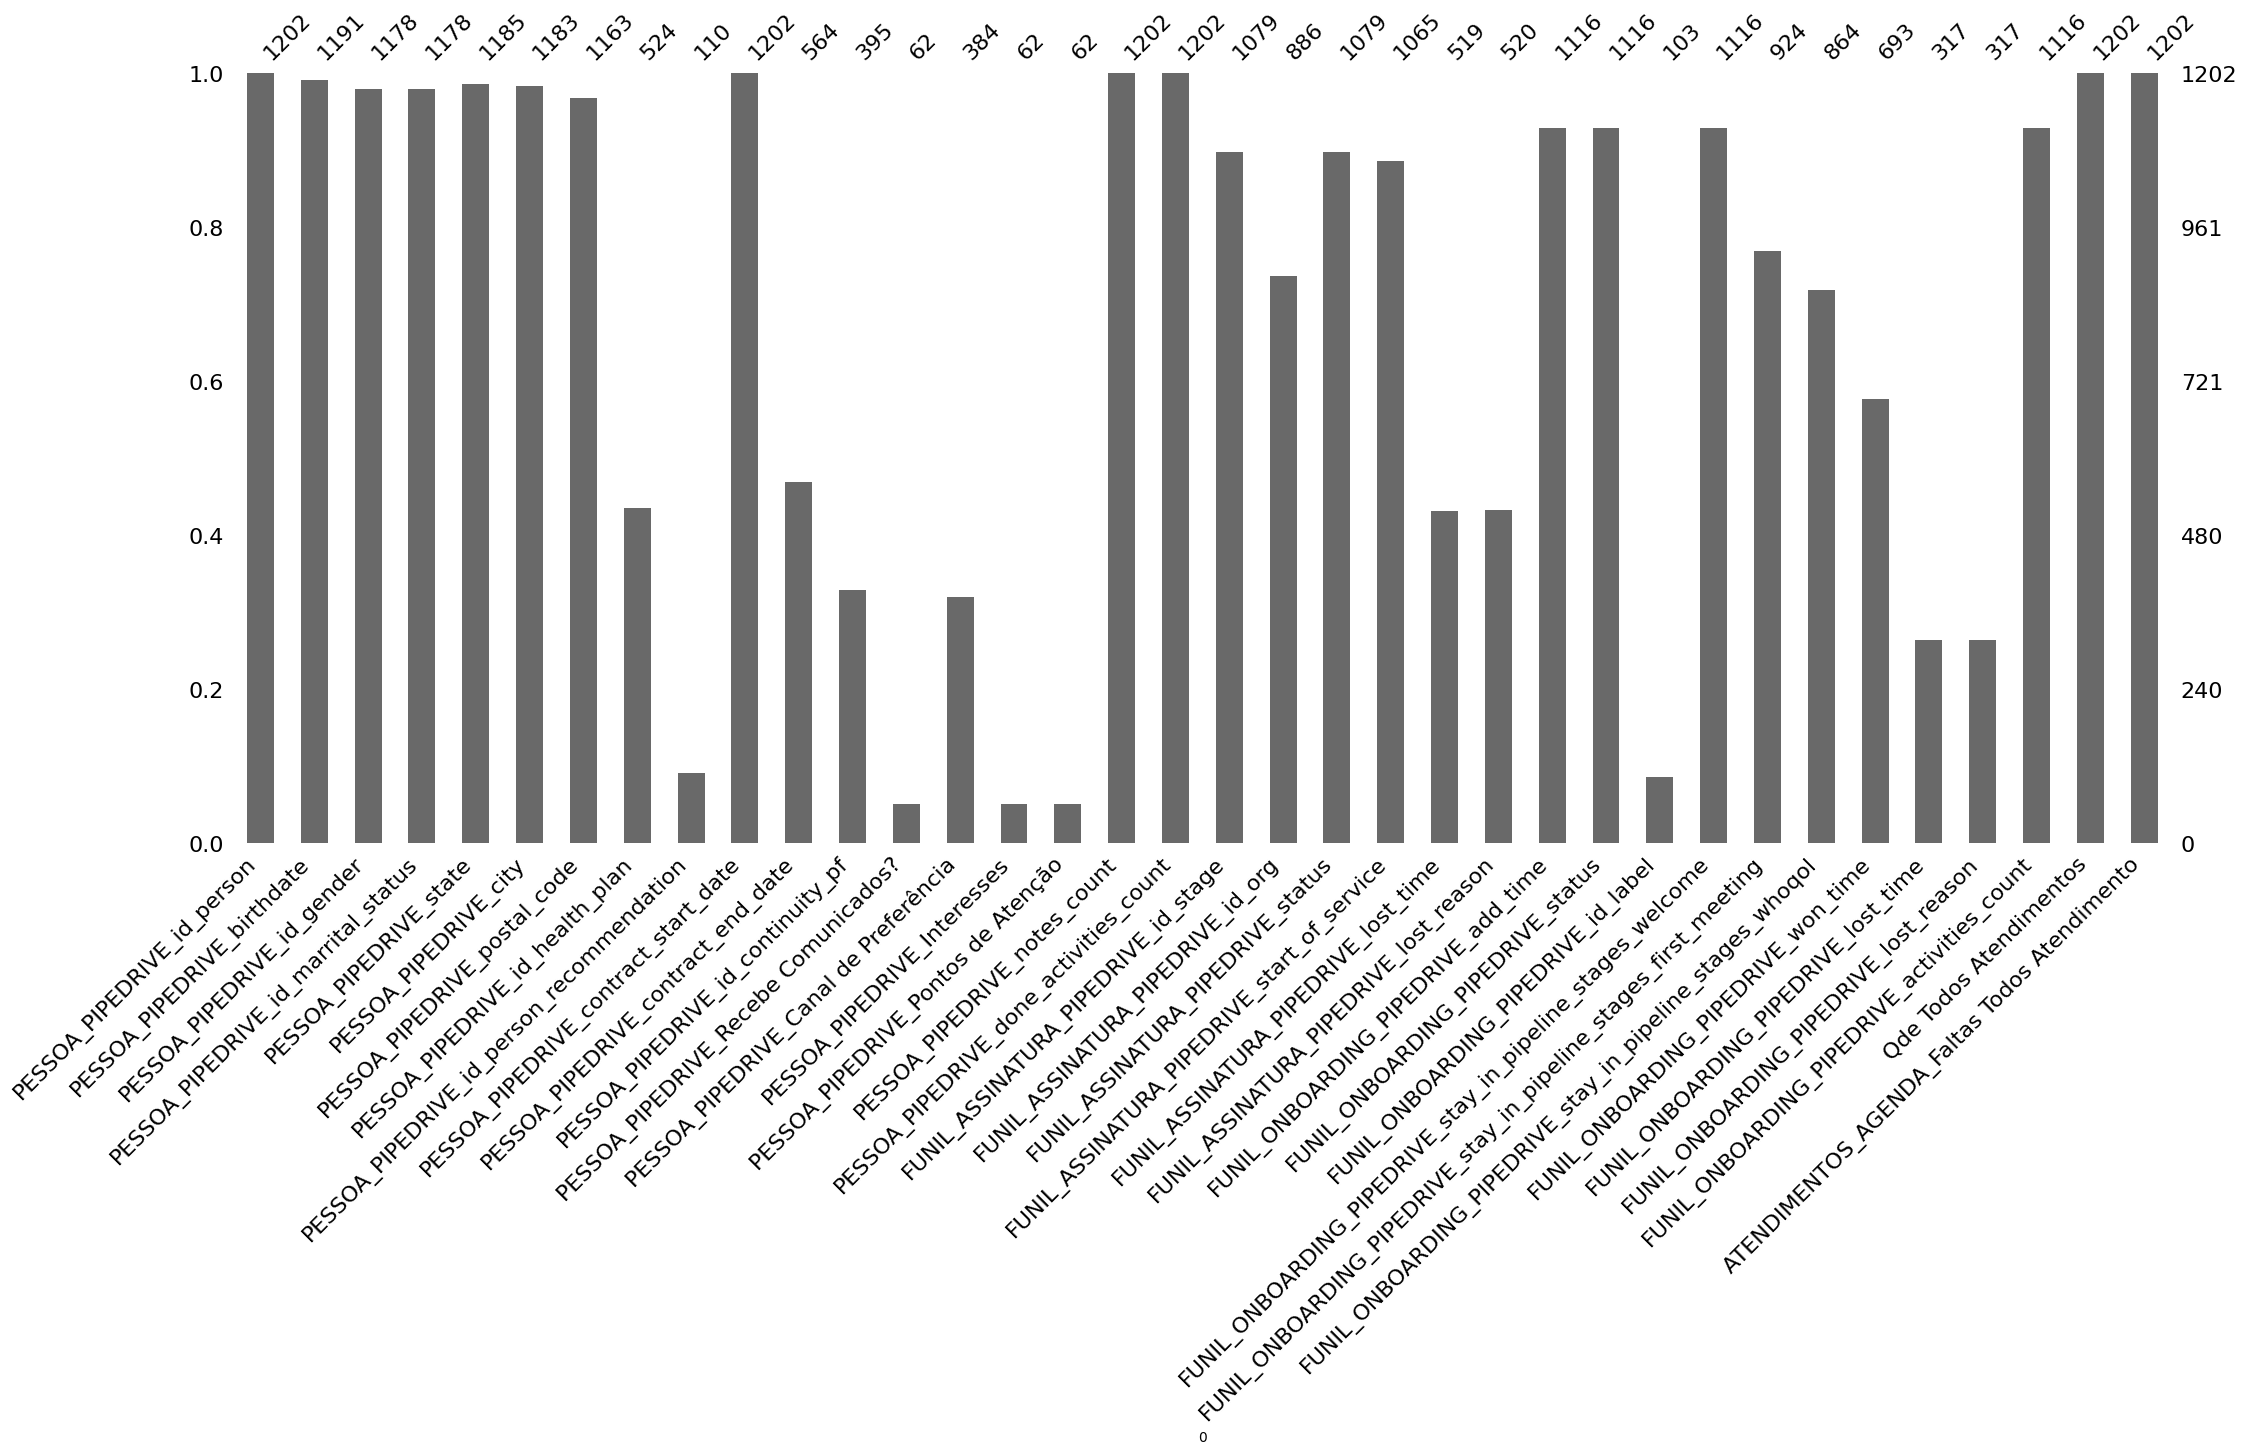

In [447]:
msno.bar(data.iloc[:,:36])

## Dropping columns with no information

    - PESSOA_PIPEDRIVE_id_person_recommendation: Identificador da pessoa que fez a indicação do benefício da Ana Health para nosso associado
    
    - PESSOA_PIPEDRIVE_Recebe Comunicados?:  Indicação se a pessoa recebe comunicados por WhatsApp da equipe de saúde da Ana Health (Opt-out)

    - PESSOA_PIPEDRIVE_Interesses: Áreas de interesse da pessoa identificados durante onversa com a equipe de saúde
    
    - PESSOA_PIPEDRIVE_Pontos de Atenção: Informações relevantes sobre a condição de saúde da pessoa, Determinantes Sociais de Saúde e Territorialização

    - FUNIL_ONBOARDING_PIPEDRIVE_id_label: Identificador do status do agendamento durante o processo de onboarding: Convera Agendada, Reagendar 


NaN No recomendation

In [448]:
data["PESSOA_PIPEDRIVE_id_person_recommendation"].value_counts()

PESSOA_PIPEDRIVE_id_person_recommendation
2379    9
1201    5
4166    4
2094    3
3238    3
       ..
3400    1
1269    1
3305    1
3261    1
4376    1
Name: count, Length: 81, dtype: int64

nan No recomendation

In [449]:
data["PESSOA_PIPEDRIVE_Recebe Comunicados?"].value_counts() 

PESSOA_PIPEDRIVE_Recebe Comunicados?
FALSE    62
Name: count, dtype: int64

nan No interest

In [450]:
data["PESSOA_PIPEDRIVE_Interesses"].value_counts() 

PESSOA_PIPEDRIVE_Interesses
FALSE    62
Name: count, dtype: int64

nan no important information

In [451]:
data["PESSOA_PIPEDRIVE_Pontos de Atenção"].value_counts() 

PESSOA_PIPEDRIVE_Pontos de Atenção
FALSE    62
Name: count, dtype: int64

no identification of status

In [452]:
data["FUNIL_ONBOARDING_PIPEDRIVE_id_label"].value_counts() 

FUNIL_ONBOARDING_PIPEDRIVE_id_label
325    54
313    40
284     8
323     1
Name: count, dtype: int64

In [453]:
data = data.drop(["PESSOA_PIPEDRIVE_id_person_recommendation","PESSOA_PIPEDRIVE_Recebe Comunicados?", "PESSOA_PIPEDRIVE_Interesses", "PESSOA_PIPEDRIVE_Pontos de Atenção", "FUNIL_ONBOARDING_PIPEDRIVE_id_label"], axis=1)

## Loking closely over each of the columns

### PESSOA_PIPEDRIVE_birthdate

Preecher NaN com a média

In [454]:
import pandas as pd
from datetime import datetime
import numpy as np

data['PESSOA_PIPEDRIVE_birthdate'] = pd.to_datetime(data['PESSOA_PIPEDRIVE_birthdate'])
data['PESSOA_PIPEDRIVE_age'] = data['PESSOA_PIPEDRIVE_birthdate'].apply(
    lambda x: datetime.today().year - x.year - ((datetime.today().month, datetime.today().day) < (x.month, x.day))
)


In [461]:
data['PESSOA_PIPEDRIVE_age'].describe()

count    1202.000000
mean       32.231281
std        10.439617
min         0.000000
25%        26.000000
50%        30.000000
75%        36.000000
max        88.000000
Name: PESSOA_PIPEDRIVE_age, dtype: float64

In [456]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data['PESSOA_PIPEDRIVE_age'] = imputer.fit_transform(data['PESSOA_PIPEDRIVE_age'].values.reshape(-1, 1))
data['PESSOA_PIPEDRIVE_age'] = np.round(data['PESSOA_PIPEDRIVE_age']).astype(int)

In [458]:
data = data.drop(['PESSOA_PIPEDRIVE_birthdate'], axis=1 )

### PESSOA_PIPEDRIVE_id_gender

Preencher NaN com a moda

In [460]:
data["PESSOA_PIPEDRIVE_id_gender"].value_counts()

PESSOA_PIPEDRIVE_id_gender
64     602
63     571
117      3
110      1
111      1
Name: count, dtype: int64

In [ ]:
data["PESSOA_PIPEDRIVE_id_gender"].fillna(64)

### PESSOA_PIPEDRIVE_id_marrital_status

In [463]:
data["PESSOA_PIPEDRIVE_id_marrital_status"].value_counts()

PESSOA_PIPEDRIVE_id_marrital_status
80    830
82    300
83     41
81      7
Name: count, dtype: int64